# Congress Committee Assignments

Text

Source: https://theunitedstates.io/

Source for Scraper of Committee Assignments: https://github.com/unitedstates/congress-legislators/blob/main/scripts/committee_membership.py

Committee Assignments: https://github.com/unitedstates/congress/wiki/committee-meetings

----

##### Imports

In [1]:
import pandas as pd
from plotnine import *

/Users/sm/.pyenv/versions/3.10.0/lib/python3.10/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('max_seq_item', None)

In [3]:
from mizani.breaks import date_breaks
from mizani.formatters import date_format

In [4]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [5]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [69]:
%%R

# My commonly used R imports

require('ggplot2')
require('readr')
require('extrafont')
require('dplyr')
require('reshape2')
require('explore')
require('tidyr')
require('forcats')
require('knitr')
require('ragg')
require('palmerpenguins')
# require('theme538')

R[write to console]: Loading required package: ragg



In [7]:
df = pd.DataFrame(
    np.random.randint(0,100,size=(100, 2)), columns=list('AB'))
df.head()

,A,B
0,99,4
1,74,30
2,96,2
3,27,46
4,74,22


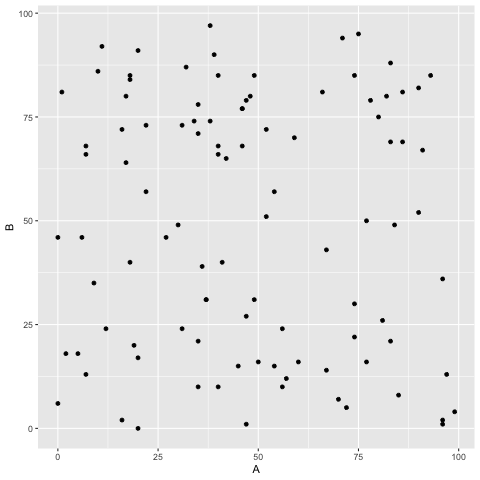

In [8]:
%%R -i df

# EXAMPLE R CELL
df
plt <- ggplot(df) +
    geom_point(aes(A,B))

plt

In [9]:
import re, lxml.html, lxml.etree
from collections import OrderedDict
import utils

In [10]:
from python_utils.import_ import import_global

In [11]:
# from utils import download, load_data, save_data

In [12]:
import yaml
import pandas as pd

In [13]:
import requests

In [14]:
# pip install us

In [15]:
import us

----

Propublica API Key: KEY: QvCILhrUqLY3PBDQtzaO7EmYrjEaEGMmBkj3R0jq

https://api.propublica.org/congress/v1/{congress}/{chamber}/committees.json

curl "https://api.propublica.org/congress/v1/115/senate/committees.json"
  -H "X-API-Key: PROPUBLICA_API_KEY"

"https://api.propublica.org/congress/v1/115/senate/committees.json-"

In [16]:
# url = f"https://theunitedstates.io/congress-legislators/committee-membership-current.json"
# response = requests.get(url)
# data_propublica = response.json()

----

### Reading in JSON Files

##### Committee Membership Current

In [17]:
url = f"https://theunitedstates.io/congress-legislators/committee-membership-current.json"
response = requests.get(url)
data_committee_membership_current = response.json()

You want grab all of the keys
9:09
2. each comittee, read into a dataframe
9:09
3. for each dataframe/comitee, tyou want to assign congresspeople to name of the comitee as a column
9:09
4. append all of the dataframes together

{'SSAF': [{'name': 'Debbie Stabenow',
   'party': 'majority',
   'rank': 1,
   'title': 'Chairman',
   'bioguide': 'S000770'},
  {'name': 'Patrick J. Leahy',
   'party': 'majority',
   'rank': 2,
   'bioguide': 'L000174'},
  {'name': 'Sherrod Brown',
   'party': 'majority',
   'rank': 3,
   'bioguide': 'B000944'},
  {'name': 'Amy Klobuchar',
   'party': 'majority',
   'rank': 4,
   'bioguide': 'K000367'},
  {'name': 'Michael F. Bennet',
   'party': 'majority',
   'rank': 5,
   'bioguide': 'B001267'},
  {'name': 'Kirsten E. Gillibrand',
   'party': 'majority',
   'rank': 6,
   'bioguide': 'G000555'},
  {'name': 'Tina Smith',
   'party': 'majority',
   'rank': 7,
   'bioguide': 'S001203'},
  {'name': 'Richard J. Durbin',
   'party': 'majority',
   'rank': 8,
   'bioguide': 'D000563'},
  {'name': 'Cory A. Booker',
   'party': 'majority',
   'rank': 9,
   'bioguide': 'B001288'},
  {'name': 'Ben Ray Luján',
   'party': 'majority',
   'rank': 10,
   'bioguide': 'L000570'},
  {'name': 'Raphael G. Warnock',
   'party': 'majority',
   'rank': 11,
   'bioguide': 'W000790'},
  {'name': 'John Boozman',
   'party': 'minority',
   'rank': 1,
   'title': 'Ranking Member',
   'bioguide': 'B001236'},
  {'name': 'Mitch McConnell',
   'party': 'minority',
   'rank': 2,
   'bioguide': 'M000355'},
  {'name': 'John Hoeven',
   'party': 'minority',
   'rank': 3,
   'bioguide': 'H001061'},
  {'name': 'Joni Ernst',
   'party': 'minority',
   'rank': 4,
   'bioguide': 'E000295'},
  {'name': 'Cindy Hyde-Smith',
   'party': 'minority',
   'rank': 5,
   'bioguide': 'H001079'},
  {'name': 'Roger Marshall',
   'party': 'minority',
   'rank': 6,
   'bioguide': 'M001198'},
  {'name': 'Tommy Tuberville',
   'party': 'minority',
   'rank': 7,
   'bioguide': 'T000278'},
  {'name': 'Chuck Grassley',
   'party': 'minority',
   'rank': 8,
   'bioguide': 'G000386'},
  {'name': 'John Thune',
   'party': 'minority',
   'rank': 9,
   'bioguide': 'T000250'},
  {'name': 'Deb Fischer',
   'party': 'minority',
   'rank': 10,
   'bioguide': 'F000463'},
  {'name': 'Mike Braun',
   'party': 'minority',
   'rank': 11,
   'bioguide': 'B001310'}],
 

In [18]:
# data_committee_membership_current

In [19]:
# data_committee_membership_current.keys()

In [20]:
# data_committee_membership_current.values()

In [21]:
# data_committee_membership_current.items()

Creating a loop for each committee

In [22]:
name2 = []
party2 = []
rank2 = []
bioguide2 = []

In [23]:
for a in data_committee_membership_current['SSAF']:
    name2.append(a['name'])
    party2.append(a['party'])
    rank2.append(a['rank'])
    bioguide2.append(a['bioguide'])

In [24]:
name2

['Debbie Stabenow',
 'Patrick J. Leahy',
 'Sherrod Brown',
 'Amy Klobuchar',
 'Michael F. Bennet',
 'Kirsten E. Gillibrand',
 'Tina Smith',
 'Richard J. Durbin',
 'Cory A. Booker',
 'Ben Ray Luján',
 'Raphael G. Warnock',
 'John Boozman',
 'Mitch McConnell',
 'John Hoeven',
 'Joni Ernst',
 'Cindy Hyde-Smith',
 'Roger Marshall',
 'Tommy Tuberville',
 'Chuck Grassley',
 'John Thune',
 'Deb Fischer',
 'Mike Braun']

##### Looping through each committee

In [25]:
# data_committee_membership_current.keys()

In [26]:
ls = []
committee_ls = []
values = []

In [27]:
for key, value in data_committee_membership_current.items(): 
#     print(key)
    ls.append(key)
    committee_ls.append(key)
#     print(value)
    ls.append(value)
    values.append(value)

In [28]:
committee_ls = []
committee = []
name = []
party = []
rank = []
bioguide = []

In [29]:
for key, value in data_committee_membership_current.items(): 
#     print(key)
    committee_ls.append(key)
#     ls.append(key)
#     print(value)
    for b in value:
        committee.append(key)
#         print(b['name'])
        name.append(b['name'])
#         print(b['party'])
        party.append(b['party'])
#         print(b['rank'])
        rank.append(b['rank'])
#         print(b['bioguide'])
        bioguide.append(b['bioguide'])
    
#     ls.append(value)

In [30]:
committee_ls[0:5]

['SSAF', 'SSAF13', 'SSAF14', 'SSAF17', 'SSAF16']

In [31]:
committee[0:5]

['SSAF', 'SSAF', 'SSAF', 'SSAF', 'SSAF']

In [32]:
name[0:5]

['Debbie Stabenow',
 'Patrick J. Leahy',
 'Sherrod Brown',
 'Amy Klobuchar',
 'Michael F. Bennet']

In [33]:
party[0:5]

['majority', 'majority', 'majority', 'majority', 'majority']

In [34]:
rank[0:5]

[1, 2, 3, 4, 5]

In [35]:
bioguide[0:5]

['S000770', 'L000174', 'B000944', 'K000367', 'B001267']

----

In [80]:
ls_member_info = []

In [81]:
for key, value in data_committee_membership_current.items():
    for b in value:
        ls_member_info.append([key, b['name'], b['party'], b['rank'], b['bioguide']])

In [76]:
# for commmittee, ls_committee_members in data_committee_membership_current.items():
#     for dict_member in ls_committee_members:
#         ls_member_info.append([committee, dict_member['name'], dict_member['party'], dict_member['rank'], dict_member['bioguide']])

In [84]:
ls_member_info[0:10]

[['SSAF', 'Debbie Stabenow', 'majority', 1, 'S000770'],
 ['SSAF', 'Patrick J. Leahy', 'majority', 2, 'L000174'],
 ['SSAF', 'Sherrod Brown', 'majority', 3, 'B000944'],
 ['SSAF', 'Amy Klobuchar', 'majority', 4, 'K000367'],
 ['SSAF', 'Michael F. Bennet', 'majority', 5, 'B001267'],
 ['SSAF', 'Kirsten E. Gillibrand', 'majority', 6, 'G000555'],
 ['SSAF', 'Tina Smith', 'majority', 7, 'S001203'],
 ['SSAF', 'Richard J. Durbin', 'majority', 8, 'D000563'],
 ['SSAF', 'Cory A. Booker', 'majority', 9, 'B001288'],
 ['SSAF', 'Ben Ray Luján', 'majority', 10, 'L000570']]

In [82]:
df_committee_membership_current = pd.DataFrame(ls_member_info, columns=['committee', 'name','party','rank', 'bioguide'])

In [83]:
df_committee_membership_current.head()

,committee,name,party,rank,bioguide
0,SSAF,Debbie Stabenow,majority,1,S000770
1,SSAF,Patrick J. Leahy,majority,2,L000174
2,SSAF,Sherrod Brown,majority,3,B000944
3,SSAF,Amy Klobuchar,majority,4,K000367
4,SSAF,Michael F. Bennet,majority,5,B001267


##### Making a Dataframe

In [36]:
df = pd.DataFrame(
    {'committee': committee,
     'name': name,
     'party': party,
     'rank': rank,
     'bioguide': bioguide
    })

In [37]:
len(df)

4004

In [38]:
df.head()

,committee,name,party,rank,bioguide
0,SSAF,Debbie Stabenow,majority,1,S000770
1,SSAF,Patrick J. Leahy,majority,2,L000174
2,SSAF,Sherrod Brown,majority,3,B000944
3,SSAF,Amy Klobuchar,majority,4,K000367
4,SSAF,Michael F. Bennet,majority,5,B001267


In [39]:
df.tail()

,committee,name,party,rank,bioguide
3999,HSEF,Kat Cammack,minority,5,C001039
4000,HSEF,Angie Craig,majority,6,C001119
4001,HSEF,Byron Donalds,minority,6,D000032
4002,HSEF,Alexandria Ocasio-Cortez,majority,7,O000172
4003,HSEF,Sara Jacobs,majority,8,J000305


In [40]:
# df.to_csv('..//data//processed//congress_committees.csv', index = False)

In [41]:
# committee_ls

----

##### Merging the Full Committee Names to Dataframe 

Merging a handmade dataset of the full Committee Names Looked up at GovTrack https://www.govtrack.us/congress/committees/

In [42]:
df2 = pd.read_csv('..//data//handmade//congress_committees_info.csv', encoding="utf-8")

In [43]:
len(df)

4004

In [44]:
len(df2)

227

In [45]:
join_df= pd.merge(df, df2, on='committee', how='outer')

In [46]:
len(join_df)

4024

In [47]:
join_df.head()

,committee,name,party,rank,bioguide,committee_fullname
0,SSAF,Debbie Stabenow,majority,1,S000770,"Senate Committee on Agriculture, Nutrition, and Forestry"
1,SSAF,Patrick J. Leahy,majority,2,L000174,"Senate Committee on Agriculture, Nutrition, and Forestry"
2,SSAF,Sherrod Brown,majority,3,B000944,"Senate Committee on Agriculture, Nutrition, and Forestry"
3,SSAF,Amy Klobuchar,majority,4,K000367,"Senate Committee on Agriculture, Nutrition, and Forestry"
4,SSAF,Michael F. Bennet,majority,5,B001267,"Senate Committee on Agriculture, Nutrition, and Forestry"


In [48]:
join_df.tail()

,committee,name,party,rank,bioguide,committee_fullname
4019,HSEF,Kat Cammack,minority,5,C001039,House Select Committee on Economic Disparity and Fairness in Growth
4020,HSEF,Angie Craig,majority,6,C001119,House Select Committee on Economic Disparity and Fairness in Growth
4021,HSEF,Byron Donalds,minority,6,D000032,House Select Committee on Economic Disparity and Fairness in Growth
4022,HSEF,Alexandria Ocasio-Cortez,majority,7,O000172,House Select Committee on Economic Disparity and Fairness in Growth
4023,HSEF,Sara Jacobs,majority,8,J000305,House Select Committee on Economic Disparity and Fairness in Growth


----

#### Scratchpad

In [49]:
# for a in values: 
#     print(a)
#     for b in a:
# #         print(b['name'])
#         name.append(b['name'])
# #         print(b['party'])
#         party.append(b['party'])
# #         print(b['rank'])
#         rank.append(b['rank'])
# #         print(b['bioguide'])
#         bioguide.append(b['bioguide'])

In [50]:
# for a in values: 
# #     print(a)
#     for b in a:
# #         print(b['name'])
#         name.append(b['name'])
# #         print(b['party'])
#         party.append(b['party'])
# #         print(b['rank'])
#         rank.append(b['rank'])
# #         print(b['bioguide'])
#         bioguide.append(b['bioguide'])

In [51]:
# ls[0:3]

In [52]:
# L = ls[0::2]
# L

In [53]:
# for a in ls[0:2]: 
#     print(a)
# #     for b in a:
# #         print(b['name'])
# #         print(b['party'])
# #         print(b['rank'])
# #         print(b['bioguide'])

In [54]:
# values

In [55]:
# data_committee_membership_current.items()

##### Current Legislators

In [56]:
url2 = f"https://theunitedstates.io/congress-legislators/legislators-current.json"
response2 = requests.get(url2)
data_legislators_current = response2.json()

In [57]:
# data_legislators_current

In [58]:
# df = pd.read_json('data/nested_list.json')

In [59]:
# # To include school_name and class 
# # https://towardsdatascience.com/how-to-convert-json-into-a-pandas-dataframe-100b2ae1e0d8

# df_nested_list = pd.json_normalize(
#     data, 
#     record_path =['students'], 
#     meta=['school_name', 'class']
# )

In [60]:
# # To include school_name and class
# df_nested_list = pd.json_normalize(
#     data_committee_membership_current, 
#     record_path =['students'], 
#     meta=['school_name', 'class']
# )

In [61]:
# df = pd.json_normalize(data_committee_membership_current, record_path =['students'])

In [62]:
# df = pd.json_normalize('data_committee_membership_current')

In [63]:
# data_committee_membership_current['SSAF']

----

In [64]:
#!/usr/bin/env python
#coding: utf-8
__author__ = 'stsmith'

# congress_lookup: Look up information about congress from the congress-legislators database
# See: https://github.com/unitedstates/congress-legislators and https://github.com/TheWalkers/congress-legislators

# The project is in the public domain within the United States, and
# copyright and related rights in the work worldwide are waived
# through the CC0 1.0 Universal public domain dedication.

# Author 2017 Steven T. Smith <steve dot t dot smith at gmail dot com>

In [65]:
import argparse as ap, contextlib, fnmatch, os, sys, time, warnings, yaml

In [66]:
# version dependent libraries
# https://docs.python.org/2/library/urllib.html
# https://docs.python.org/3.0/library/urllib.parse.html

In [67]:
# #!/usr/bin/env python
# #coding: utf-8
# __author__ = 'stsmith'

# # congress_lookup: Look up information about congress from the congress-legislators database
# # See: https://github.com/unitedstates/congress-legislators and https://github.com/TheWalkers/congress-legislators

# # The project is in the public domain within the United States, and
# # copyright and related rights in the work worldwide are waived
# # through the CC0 1.0 Universal public domain dedication.

# # Author 2017 Steven T. Smith <steve dot t dot smith at gmail dot com>

# import argparse as ap, contextlib, fnmatch, os, sys, time, warnings, yaml

# # version dependent libraries
# # https://docs.python.org/2/library/urllib.html
# # https://docs.python.org/3.0/library/urllib.parse.html
# if (sys.version_info > (3, 0)):
#     from urllib.request import urlopen
#     import urllib.parse as urlparse
# else:
#     from urllib2 import urlopen
#     import urlparse

# class CongressLookup:
#     '''A class used to lookup legislator properties from the github congress-legislators YAML database.'''

#     def __init__(self):
#         self.args = self.parseArgs()
#         self.data_path = os.path.join(os.path.dirname(os.path.realpath(__file__)),self.args.data_dir)
#         self.properties = dict()
#         self.database_load()
#         for prop in self.args.properties: self.lookup_property(prop)

#     def parseArgs(self):
#         parser = ap.ArgumentParser()
#         parser.add_argument('properties', metavar='PROPS', type=str, nargs='+',
#                             help='Properties to look up')
#         parser.add_argument('-c', '--committee', help="Committee name (wildcard)", type=str, default=None)
#         parser.add_argument('-n', '--last-name', help="Last name of legislator (wildcard)", type=str, default=None)
#         parser.add_argument('-d', '--data-dir', help="Database directory", type=str, default='.')
#         parser.add_argument('-r', '--repo', help="GitHub repo URL", type=str, default='https://github.com/unitedstates/congress-legislators/')
#         parser.add_argument('-T', '--current-term', help="Properties from only the current term", action='store_true')
#         parser.add_argument('-D', '--download', help="Download data", action='store_true', default=False)
#         parser.add_argument('-g', '--debug', help="Debug flag", action='store_true')
#         return parser.parse_args()

#     def lookup_property(self,property):
#         if self.args.committee is not None:
#             self.lookup_by_committee(property)
#         if self.args.last_name is not None:
#             self.lookup_by_lastname(property)

#     def lookup_by_committee(self,property):
#         for comm in (comm for comm in self.committees if self.inclusive_wildcard_match(comm['name'],self.args.committee)):
#             if self.args.debug: print(comm)
#             print('"{}" member properties:'.format(comm['name'].encode('utf-8')))
#             members = self.membership[comm['thomas_id']] if comm['thomas_id'] in self.membership else []
#             for member in members: self.lookup_by_member(property,member)

#     def inclusive_wildcard_match(self,name,pat):
#         if any(c in pat for c in '*?[]'):       # a wildcard pattern
#             # prepend or append a * for inclusiveness if not already there
#             if pat[0] != '*': pat = '*' + pat
#             if pat[-1] != '*': pat = pat + '*'
#         else:                                   # not a wildcard
#             pat = '*' + pat + '*'
#         return fnmatch.fnmatch(name,pat)

#     def lookup_by_member(self,property,member):
#         for leg in ( leg for leg in self.legislators if \
#                     (leg['name']['official_full'] == member['name']) \
#                     or ('bioguide' in leg['id'] and 'bioguide' in member and leg['id']['bioguide'] == member['bioguide']) \
#                     or ('thomas' in leg['id'] and 'thomas' in member and leg['id']['thomas'] == member['thomas']) ):
#             self.lookup_legislator_properties(property,leg)

#     def lookup_by_lastname(self,property):
#         for leg in (leg for leg in self.legislators if fnmatch.fnmatch(leg['name']['last'],self.args.last_name)):
#             if self.args.debug: print(leg)
#             self.lookup_legislator_properties(property,leg)

#     def lookup_legislator_properties(self,property,legislator):
#         self.properties[property] = set([term[property] for term in legislator['terms'] if self.lookup_filter(property,term)])
#         for off in self.offices:
#             if self.args.debug: print(off)
#             if any(off['id'][db] == legislator['id'][db] for db in off['id'] if db in off['id'] and db in legislator['id']):
#                 self.properties[property] |= set([ok[property] for ok in off['offices'] if property in ok and len(ok[property]) > 0])
#                 break
#         print('Property \'{}\' for {}:'.format(property,legislator['name']['official_full'].encode('utf-8')))
#         print('\n'.join(sorted(self.properties[property])))

#     def lookup_filter(self,property,term):
#         result = property in term and len(term[property]) > 0
#         if result and self.args.current_term:
#             result &= 'end' in term and time.strptime(term['end'],'%Y-%m-%d') >= time.localtime()
#         return result

#     def database_load(self):
#         try:
#             with self.database_access('legislators-current.yaml') as y:
#                 self.legislators = self.yaml_load(y, Loader=yaml.CLoader)
#             with self.database_access('legislators-district-offices.yaml') as y:
#                 self.offices = self.yaml_load(y, Loader=yaml.CLoader)
#             if self.args.committee is not None:
#                 with self.database_access('committees-current.yaml') as y:
#                     self.committees = self.yaml_load(y, Loader=yaml.CLoader)
#                 with self.database_access('committee-membership-current.yaml') as y:
#                     self.membership = self.yaml_load(y, Loader=yaml.CLoader)
#             else:
#                 self.committees = None
#         except (BaseException,IOError) as e:
#             print(e)
#             raise Exception('Clone data from {} and copy it to {} .'.format(self.args.repo,self.data_path))

#     def yaml_load(self,y,Loader=yaml.loader.Loader):
#         res = yaml.load(y, Loader=Loader)
#         if res is None: res = []  # make it an empty iterable
#         return res

#     def database_access(self,filename):
#         if self.args.download:
#             if self.args.repo[-1] != '/': self.args.repo += '/'
#             url_base = urlparse.urljoin(urlparse.urlunparse(urlparse.urlparse(self.args.repo)._replace(netloc='raw.githubusercontent.com')),'main/')
#             # contextlib required for urlopen in with ... as for v < 3.3
#             res = contextlib.closing(urlopen( urlparse.urljoin(url_base,filename) ))
#         else:
#             fname_fullpath = os.path.join(self.data_path,filename)
#             if os.path.exists(fname_fullpath):
#                 res = open(fname_fullpath,'r')
#             else:
#                 warnings.warn('File {} doesn\'t exist; clone data from {} and copy it to {} .'.format(filename,self.args.repo,self.data_path))
#                 res = self.Emptysource()
#         return res

#     class Emptysource(object):
#         def read(self, size):
#             return ''  # empty
#         def write(self, data):
#             pass  # ignore the data
#         def __enter__(self): return self
#         def __exit__(*x): pass


# if __name__ == "__main__":
#     res = CongressLookup()


----